<a href="https://colab.research.google.com/github/Pdaret/MIO-TCD-CNN/blob/main/MIO_TCD_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracting file 
we use **dataset** rar file an extract it to colab runtime `sample_data` folder

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!unrar x "/content/drive/MyDrive/HW02-Practical.rar" "/content/sample_data/miotcd"

optional

In [ ]:
!apt
from pyunpack import Archive
Archive('/content/drive/MyDrive/HW02-Practical.rar').extractall('/content/sample_data/miotcd')

# <font color = 'red'># Part 1</font>

# Under Fitting Model 

To induce underfitting in our model, we can make it less complex or reduce the capacity of the model. Here are a few modifications we can make to our model to encourage underfitting:

1. Decrease the number of filters in the convolutional layers: By reducing the number of filters, the model will extract fewer features, leading to a simpler representation.

2. Remove a convolutional layer: Removing a layer reduces the depth of the model and further simplifies it.

3. Reduce the number of neurons in the dense layer: By decreasing the number of neurons, you reduce the complexity of the model's fully connected layers.

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    '/content/sample_data/miotcd/HW02-Practical/Dataset/train',
    target_size=(128, 128),
    batch_size=128,
    class_mode='categorical'
)

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    '/content/sample_data/miotcd/HW02-Practical/Dataset/valid',
    target_size=(128, 128),
    batch_size=128,
    class_mode='categorical'
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        '/content/sample_data/miotcd/HW02-Practical/Dataset/test',
        target_size=(128, 128),
        batch_size=512,
        class_mode='categorical'
)



Found 15000 images belonging to 5 classes.
Found 5000 images belonging to 5 classes.
Found 5000 images belonging to 5 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // validation_generator.batch_size
)

Epoch 1/10
117/117 [==============================] - 40s 253ms/step - loss: 1.8079 - accuracy: 0.1963 - val_loss: 1.6094 - val_accuracy: 0.1999
Epoch 2/10
117/117 [==============================] - 30s 255ms/step - loss: 1.6095 - accuracy: 0.1934 - val_loss: 1.6094 - val_accuracy: 0.1995
Epoch 3/10
117/117 [==============================] - 31s 262ms/step - loss: 1.6095 - accuracy: 0.1952 - val_loss: 1.6094 - val_accuracy: 0.2001
Epoch 4/10
117/117 [==============================] - 29s 247ms/step - loss: 1.6095 - accuracy: 0.1898 - val_loss: 1.6094 - val_accuracy: 0.1999
Epoch 5/10
117/117 [==============================] - 31s 269ms/step - loss: 1.6095 - accuracy: 0.2002 - val_loss: 1.6094 - val_accuracy: 0.1997
Epoch 6/10
117/117 [==============================] - 29s 247ms/step - loss: 1.6095 - accuracy: 0.1974 - val_loss: 1.6094 - val_accuracy: 0.2001
Epoch 7/10
117/117 [==============================] - 29s 246ms/step - loss: 1.6095 - accuracy: 0.1958 - val_loss: 1.6094 - val_ac

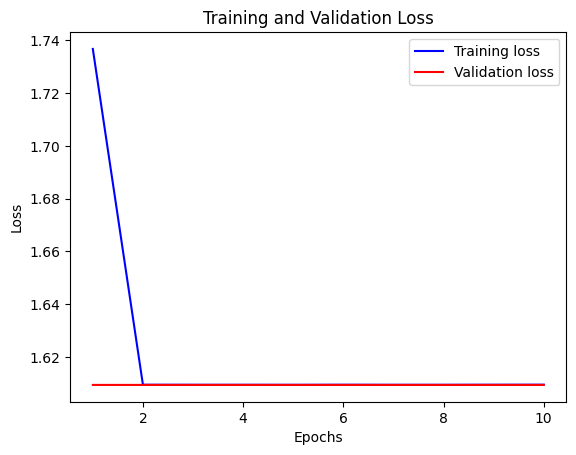

In [ ]:
import matplotlib.pyplot as plt

# Accessing the loss values
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting the loss values
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
score = model.evaluate(test_generator)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Found 5000 images belonging to 5 classes.
10/10 [==============================] - 7s 602ms/step - loss: 1.6094 - accuracy: 0.2000
Test loss: 1.6094413995742798
Test accuracy: 0.20000000298023224


# Over Fitting Model
To induce overfitting in our model, we can increase its capacity or complexity. Here are a few modifications we can make to our model to encourage overfitting:

1. Increase the number of filters in the convolutional layers: By increasing the number of filters, the model can learn more complex features from the input data.

2. Add more convolutional layers: Increasing the depth of the model allows it to learn more intricate patterns in the data.

3. Increase the number of neurons in the dense layer: By adding more neurons, the model can capture more complex relationships in the data.

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    '/content/sample_data/miotcd/HW02-Practical/Dataset/train',
    target_size=(128, 128),
    batch_size=128,
    class_mode='categorical'
)

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    '/content/sample_data/miotcd/HW02-Practical/Dataset/valid',
    target_size=(128, 128),
    batch_size=128,
    class_mode='categorical'
)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(64, (3, 3),activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // validation_generator.batch_size
    )

Epoch 1/10
117/117 [==============================] - 71s 467ms/step - loss: 1.1195 - accuracy: 0.5616 - val_loss: 0.8049 - val_accuracy: 0.7262
Epoch 2/10
117/117 [==============================] - 53s 454ms/step - loss: 0.6125 - accuracy: 0.7805 - val_loss: 0.5589 - val_accuracy: 0.8039
Epoch 3/10
117/117 [==============================] - 61s 519ms/step - loss: 0.4247 - accuracy: 0.8536 - val_loss: 0.4877 - val_accuracy: 0.8317
Epoch 4/10
117/117 [==============================] - 53s 450ms/step - loss: 0.3164 - accuracy: 0.8934 - val_loss: 0.4300 - val_accuracy: 0.8558
Epoch 5/10
117/117 [==============================] - 61s 518ms/step - loss: 0.2245 - accuracy: 0.9248 - val_loss: 0.4789 - val_accuracy: 0.8580
Epoch 6/10
117/117 [==============================] - 60s 515ms/step - loss: 0.1573 - accuracy: 0.9477 - val_loss: 0.4165 - val_accuracy: 0.8812
Epoch 7/10
117/117 [==============================] - 53s 453ms/step - loss: 0.1264 - accuracy: 0.9582 - val_loss: 0.4351 - val_ac

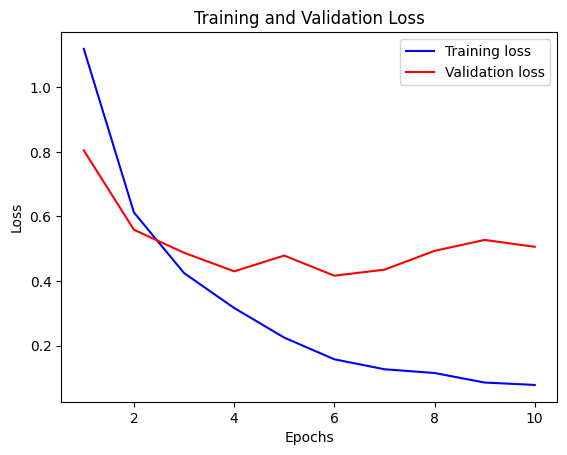

In [ ]:
import matplotlib.pyplot as plt

# Accessing the loss values
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting the loss values
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        '/content/sample_data/miotcd/HW02-Practical/Dataset/test',
        target_size=(128, 128),
        batch_size=512,
        class_mode='categorical')

score = model.evaluate(test_generator)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Found 4852 images belonging to 5 classes.
10/10 [==============================] - 17s 1s/step - loss: 0.6489 - accuracy: 0.8508
Test loss: 0.6489183306694031
Test accuracy: 0.8507831692695618


# Best Fitting Model
To perform hyperparameter tuning for our model using two different methods, specifically setting the learning rate using `grid search` and setting the learning rate using the `wandb` or `comet` libraries, we can follow the code snippets provided below.

**First, I'll demonstrate how to set the learning rate using grid search. For this purpose, we'll use the `GridSearchCV` class from the `sklearn` library. Here's an code:**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/FCI-HW2/HW02-Practical/Dataset/train',
    target_size=(128, 128),
    batch_size=128,
    class_mode='categorical'
)

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    '/content/drive/MyDrive/FCI-HW2/HW02-Practical/Dataset/valid',
    target_size=(128, 128),
    batch_size=128,
    class_mode='categorical'
)

Found 15000 images belonging to 5 classes.
Found 5000 images belonging to 5 classes.


In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the model architecture
def create_model(learning_rate):
    model = Sequential()
    model.add(Conv2D(64, (3, 3),activation='relu', input_shape=(128, 128, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(256, (3, 3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(5, activation='softmax'))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Create the Keras classifier for use in GridSearchCV
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=128, verbose=0)

# Define the grid search parameters
learning_rate = [0.0001, 0.001, 0.01, 0.1]

param_grid = dict(learning_rate=learning_rate)

# Load the data from the generator
X_train, y_train = next(train_generator)
X_val, y_val = next(validation_generator)

# Create the grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train, validation_data=(X_val, y_val))

# Print the best parameters and score
print("Best parameters: ", grid_result.best_params_)
print("Best score: ", grid_result.best_score_)

<ipython-input-24-15afdd8771bb>:29: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=128, verbose=0)


Best parameters:  {'learning_rate': 0.0001}
Best score:  0.36674050490061444


**now we plot the best model loss**

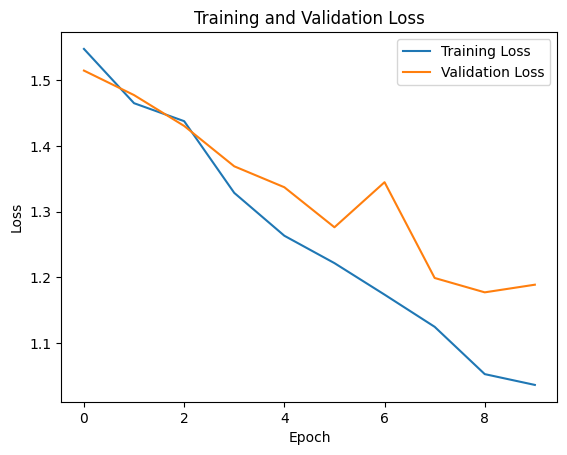

In [ ]:
import matplotlib.pyplot as plt

# Get the best parameters and corresponding model
best_params = grid_result.best_params_
best_model = grid_result.best_estimator_.model

# Train the model with the best parameters
history = best_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=128, verbose=0)

# Plot the loss on the training and validation sets
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Now, let's move on to setting the learning rate using the `wandb` or `comet` libraries. These libraries allow us to track and log experiments, including hyperparameters. Here's an code snippets using `wandb`:**

In [ ]:
import wandb

wandb.login()


# Define sweep config
sweep_configuration = {
    'method': 'grid',
    'name': 'sweep_grid',
    'metric': {'goal': 'maximize', 'name': 'val_accuracy'},
    'parameters': {
        'learning_rate': {'values': [1e-3, 1e-4, 1e-5]}
    }
}

# Default values for hyper-parameters we're going to sweep over
configs = {
       'learning_rate' : 0.001
   }


wandb: Currently logged in as: mr-srezaei. Use `wandb login --relogin` to force relogin


In [ ]:
# Initialize sweep by passing in the config
sweep_id = wandb.sweep(sweep_configuration, project="miotcd")

wandb: Network error (ReadTimeout), entering retry loop.


Create sweep with ID: 7zgqhsyq
Sweep URL: https://wandb.ai/mr-srezaei/miotcd/sweeps/7zgqhsyq


In [ ]:
import tensorflow as tf
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from wandb.keras import WandbCallback


def train(config = None):
    with wandb.init(config=config):
        config = wandb.config

        model = Sequential()
        model.add(Conv2D(64, (3, 3),activation='relu', input_shape=(128, 128, 3)))
        model.add(MaxPooling2D(pool_size=(2, 2)))

        model.add(Conv2D(128, (3, 3),activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))

        model.add(Conv2D(256, (3, 3),activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))

        model.add(Flatten())
        model.add(Dense(512, activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(256, activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(5, activation='softmax'))


        # Set the learning rate using wandb
        optimizer = Adam(learning_rate=config.learning_rate)
        model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

        # Train the model and log the metrics
        model.fit(train_generator,
              steps_per_epoch=train_generator.n // train_generator.batch_size,
              epochs=10,
              validation_data=validation_generator,
              validation_steps=validation_generator.n // validation_generator.batch_size,
              callbacks=[WandbCallback()])
        wandb.log({'train_loss': model.history.history['loss'], 'val_loss': model.history.history['val_loss']})

In [ ]:
wandb.agent(sweep_id, train, count=5)

wandb: Agent Starting Run: jbhenuzr with config:
wandb: 	learning_rate: 0.001


wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Epoch 1/10
117/117 [==============================] - ETA: 0s - loss: 1.1485 - accuracy: 0.5381

wandb: Adding directory to artifact (/content/wandb/run-20230521_204112-jbhenuzr/files/model-best)... Done. 1.4s


117/117 [==============================] - 79s 610ms/step - loss: 1.1485 - accuracy: 0.5381 - val_loss: 0.7554 - val_accuracy: 0.7183
Epoch 2/10
117/117 [==============================] - ETA: 0s - loss: 0.6320 - accuracy: 0.7715

wandb: Adding directory to artifact (/content/wandb/run-20230521_204112-jbhenuzr/files/model-best)... Done. 1.4s


117/117 [==============================] - 71s 605ms/step - loss: 0.6320 - accuracy: 0.7715 - val_loss: 0.6022 - val_accuracy: 0.7881
Epoch 3/10
117/117 [==============================] - ETA: 0s - loss: 0.4469 - accuracy: 0.8448

wandb: Adding directory to artifact (/content/wandb/run-20230521_204112-jbhenuzr/files/model-best)... Done. 1.8s


117/117 [==============================] - 60s 516ms/step - loss: 0.4469 - accuracy: 0.8448 - val_loss: 0.5489 - val_accuracy: 0.8259
Epoch 4/10
117/117 [==============================] - ETA: 0s - loss: 0.3106 - accuracy: 0.8959

wandb: Adding directory to artifact (/content/wandb/run-20230521_204112-jbhenuzr/files/model-best)... Done. 1.5s


117/117 [==============================] - 68s 585ms/step - loss: 0.3106 - accuracy: 0.8959 - val_loss: 0.4516 - val_accuracy: 0.8534
Epoch 5/10
117/117 [==============================] - ETA: 0s - loss: 0.2243 - accuracy: 0.9225

wandb: Adding directory to artifact (/content/wandb/run-20230521_204112-jbhenuzr/files/model-best)... Done. 1.5s


117/117 [==============================] - 69s 587ms/step - loss: 0.2243 - accuracy: 0.9225 - val_loss: 0.4276 - val_accuracy: 0.8744
Epoch 6/10
117/117 [==============================] - 55s 467ms/step - loss: 0.1726 - accuracy: 0.9406 - val_loss: 0.4545 - val_accuracy: 0.8592
Epoch 7/10
117/117 [==============================] - 62s 532ms/step - loss: 0.1297 - accuracy: 0.9584 - val_loss: 0.4372 - val_accuracy: 0.8780
Epoch 8/10
117/117 [==============================] - 53s 450ms/step - loss: 0.1056 - accuracy: 0.9664 - val_loss: 0.4651 - val_accuracy: 0.8722
Epoch 9/10
117/117 [==============================] - 61s 522ms/step - loss: 0.0834 - accuracy: 0.9727 - val_loss: 0.5455 - val_accuracy: 0.8776
Epoch 10/10
117/117 [==============================] - 52s 446ms/step - loss: 0.0667 - accuracy: 0.9788 - val_loss: 0.5951 - val_accuracy: 0.8710


accuracy,▁▅▆▇▇▇████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▅▃▃▂▂▁▁▁▁
val_accuracy,▁▄▆▇█▇████
val_loss,█▅▄▂▁▂▁▂▄▅
accuracy,0.97878
best_epoch,4
best_val_loss,0.42758
epoch,9
loss,0.06673
val_accuracy,0.87099


wandb: Agent Starting Run: l7jfdutt with config:
wandb: 	learning_rate: 0.0001


Epoch 1/10
117/117 [==============================] - ETA: 0s - loss: 1.2488 - accuracy: 0.4884

wandb: Adding directory to artifact (/content/wandb/run-20230521_205318-l7jfdutt/files/model-best)... Done. 1.7s


117/117 [==============================] - 77s 645ms/step - loss: 1.2488 - accuracy: 0.4884 - val_loss: 0.8769 - val_accuracy: 0.6937
Epoch 2/10
117/117 [==============================] - ETA: 0s - loss: 0.8659 - accuracy: 0.6816

wandb: Adding directory to artifact (/content/wandb/run-20230521_205318-l7jfdutt/files/model-best)... Done. 6.9s


117/117 [==============================] - 73s 627ms/step - loss: 0.8659 - accuracy: 0.6816 - val_loss: 0.7876 - val_accuracy: 0.7165
Epoch 3/10
117/117 [==============================] - ETA: 0s - loss: 0.6937 - accuracy: 0.7523

wandb: Adding directory to artifact (/content/wandb/run-20230521_205318-l7jfdutt/files/model-best)... Done. 2.1s


117/117 [==============================] - 61s 518ms/step - loss: 0.6937 - accuracy: 0.7523 - val_loss: 0.6992 - val_accuracy: 0.7610
Epoch 4/10
117/117 [==============================] - ETA: 0s - loss: 0.5837 - accuracy: 0.7915

wandb: Adding directory to artifact (/content/wandb/run-20230521_205318-l7jfdutt/files/model-best)... Done. 1.8s


117/117 [==============================] - 67s 572ms/step - loss: 0.5837 - accuracy: 0.7915 - val_loss: 0.6243 - val_accuracy: 0.7780
Epoch 5/10
117/117 [==============================] - ETA: 0s - loss: 0.5034 - accuracy: 0.8243

wandb: Adding directory to artifact (/content/wandb/run-20230521_205318-l7jfdutt/files/model-best)... Done. 1.7s


117/117 [==============================] - 67s 575ms/step - loss: 0.5034 - accuracy: 0.8243 - val_loss: 0.5487 - val_accuracy: 0.8151
Epoch 6/10
117/117 [==============================] - ETA: 0s - loss: 0.4339 - accuracy: 0.8542

wandb: Adding directory to artifact (/content/wandb/run-20230521_205318-l7jfdutt/files/model-best)... Done. 3.0s


117/117 [==============================] - 72s 617ms/step - loss: 0.4339 - accuracy: 0.8542 - val_loss: 0.5038 - val_accuracy: 0.8323
Epoch 7/10
117/117 [==============================] - 52s 447ms/step - loss: 0.3767 - accuracy: 0.8730 - val_loss: 0.5365 - val_accuracy: 0.8285
Epoch 8/10
117/117 [==============================] - ETA: 0s - loss: 0.3216 - accuracy: 0.8912

wandb: Adding directory to artifact (/content/wandb/run-20230521_205318-l7jfdutt/files/model-best)... Done. 1.8s


117/117 [==============================] - 68s 588ms/step - loss: 0.3216 - accuracy: 0.8912 - val_loss: 0.4634 - val_accuracy: 0.8476
Epoch 9/10
117/117 [==============================] - 63s 538ms/step - loss: 0.2861 - accuracy: 0.9063 - val_loss: 0.4753 - val_accuracy: 0.8385
Epoch 10/10
117/117 [==============================] - ETA: 0s - loss: 0.2563 - accuracy: 0.9160

wandb: Adding directory to artifact (/content/wandb/run-20230521_205318-l7jfdutt/files/model-best)... Done. 4.6s


117/117 [==============================] - 72s 617ms/step - loss: 0.2563 - accuracy: 0.9160 - val_loss: 0.4443 - val_accuracy: 0.8564


accuracy,▁▄▅▆▆▇▇███
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▅▄▃▃▂▂▁▁▁
val_accuracy,▁▂▄▅▆▇▇█▇█
val_loss,█▇▅▄▃▂▂▁▂▁
accuracy,0.91601
best_epoch,9
best_val_loss,0.44431
epoch,9
loss,0.25628
val_accuracy,0.85637


wandb: Agent Starting Run: 6qpf5tq9 with config:
wandb: 	learning_rate: 1e-05


Epoch 1/10
117/117 [==============================] - ETA: 0s - loss: 1.5452 - accuracy: 0.3141

wandb: Adding directory to artifact (/content/wandb/run-20230521_210558-6qpf5tq9/files/model-best)... Done. 3.7s


117/117 [==============================] - 72s 588ms/step - loss: 1.5452 - accuracy: 0.3141 - val_loss: 1.3889 - val_accuracy: 0.5853
Epoch 2/10
117/117 [==============================] - ETA: 0s - loss: 1.2785 - accuracy: 0.5172

wandb: Adding directory to artifact (/content/wandb/run-20230521_210558-6qpf5tq9/files/model-best)... Done. 1.7s


117/117 [==============================] - 74s 630ms/step - loss: 1.2785 - accuracy: 0.5172 - val_loss: 1.0914 - val_accuracy: 0.6102
Epoch 3/10
117/117 [==============================] - ETA: 0s - loss: 1.0983 - accuracy: 0.5887

wandb: Adding directory to artifact (/content/wandb/run-20230521_210558-6qpf5tq9/files/model-best)... Done. 1.9s


117/117 [==============================] - 61s 520ms/step - loss: 1.0983 - accuracy: 0.5887 - val_loss: 0.9626 - val_accuracy: 0.6675
Epoch 4/10
117/117 [==============================] - ETA: 0s - loss: 1.0072 - accuracy: 0.6296

wandb: Adding directory to artifact (/content/wandb/run-20230521_210558-6qpf5tq9/files/model-best)... Done. 2.3s


117/117 [==============================] - 63s 541ms/step - loss: 1.0072 - accuracy: 0.6296 - val_loss: 0.9125 - val_accuracy: 0.6707
Epoch 5/10
117/117 [==============================] - ETA: 0s - loss: 0.9463 - accuracy: 0.6497

wandb: Adding directory to artifact (/content/wandb/run-20230521_210558-6qpf5tq9/files/model-best)... Done. 4.4s


117/117 [==============================] - 79s 679ms/step - loss: 0.9463 - accuracy: 0.6497 - val_loss: 0.8700 - val_accuracy: 0.6921
Epoch 6/10
117/117 [==============================] - ETA: 0s - loss: 0.8953 - accuracy: 0.6733

wandb: Adding directory to artifact (/content/wandb/run-20230521_210558-6qpf5tq9/files/model-best)... Done. 2.0s


117/117 [==============================] - 73s 625ms/step - loss: 0.8953 - accuracy: 0.6733 - val_loss: 0.8355 - val_accuracy: 0.6969
Epoch 7/10
117/117 [==============================] - ETA: 0s - loss: 0.8615 - accuracy: 0.6823

wandb: Adding directory to artifact (/content/wandb/run-20230521_210558-6qpf5tq9/files/model-best)... Done. 1.7s


117/117 [==============================] - 68s 582ms/step - loss: 0.8615 - accuracy: 0.6823 - val_loss: 0.8085 - val_accuracy: 0.7131
Epoch 8/10
117/117 [==============================] - ETA: 0s - loss: 0.8312 - accuracy: 0.6972

wandb: Adding directory to artifact (/content/wandb/run-20230521_210558-6qpf5tq9/files/model-best)... Done. 5.7s


117/117 [==============================] - 76s 650ms/step - loss: 0.8312 - accuracy: 0.6972 - val_loss: 0.7864 - val_accuracy: 0.7196
Epoch 9/10
117/117 [==============================] - ETA: 0s - loss: 0.8053 - accuracy: 0.7096

wandb: Adding directory to artifact (/content/wandb/run-20230521_210558-6qpf5tq9/files/model-best)... Done. 6.8s


117/117 [==============================] - 78s 667ms/step - loss: 0.8053 - accuracy: 0.7096 - val_loss: 0.7709 - val_accuracy: 0.7306
Epoch 10/10
117/117 [==============================] - ETA: 0s - loss: 0.7830 - accuracy: 0.7137

wandb: Adding directory to artifact (/content/wandb/run-20230521_210558-6qpf5tq9/files/model-best)... Done. 1.7s


117/117 [==============================] - 62s 530ms/step - loss: 0.7830 - accuracy: 0.7137 - val_loss: 0.7590 - val_accuracy: 0.7344


accuracy,▁▅▆▇▇▇▇███
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▆▄▃▂▂▂▁▁▁
val_accuracy,▁▂▅▅▆▆▇▇██
val_loss,█▅▃▃▂▂▂▁▁▁
accuracy,0.71366
best_epoch,9
best_val_loss,0.75898
epoch,9
loss,0.78304
val_accuracy,0.73438


wandb: Sweep Agent: Waiting for job.
wandb: Sweep Agent: Exiting.


# Evaluating Files
in the code snippets below we save our evaluating scores into csv file

In [ ]:
!pip install wandb

In [ ]:
import wandb
import tensorflow as tf
wandb.login()

run = wandb.init()
artifact = run.use_artifact('mr-srezaei/miotcd/model-zesty-sweep-1:v4', type='model')
artifact_dir = artifact.download()

best_model = tf.keras.models.load_model(artifact_dir)

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


wandb: Downloading large artifact model-zesty-sweep-1:v4, 300.03MB. 5 files... 
wandb:   5 of 5 files downloaded.  
Done. 0:0:1.8


In [ ]:
from os import listdir
from os.path import isfile, join, splitext
from tqdm import tqdm
import numpy as np
import csv
import pandas as pd

# Define your classes
classes = ['articulated_truck', 'bus', 'car', 'work_van', 'background']

def load_and_preprocess_image(image_path):
    # Read image from file
    image = tf.io.read_file(image_path)
    
    # Decode image and convert to desired format
    image = tf.image.decode_image(image, channels=3)
    
    # Resize the image to (128, 128)
    image = tf.image.resize(image, [128, 128])
    
    # Rescale the pixel values to the range [0, 1]
    image = image / 255.0
    
    return image

def classify_image(path_to_image):

    # Load the image and preprocess it if needed
    image = load_and_preprocess_image(path_to_image)

    # Make predictions using your trained model
    predictions = best_model.predict(np.array([image]))  # Assuming 'model' is your trained model

    # Get the predicted label
    label_index = np.argmax(predictions[0])
    label = classes[label_index]

    return label

def parse_dataset(path_to_dataset):
    '''
    Parse every image contained in 'path_to_dataset' (a path to the training
    or testing set), classify each image and save in a csv file the resulting
    assignment

    dataset_result: dict structure returned by the function.  It contains the
            label of each image
    '''
    llist = listdir(path_to_dataset)
    dataset_result = {}

    for name in tqdm(llist):
        dn = join(path_to_dataset, name)
        if isfile(dn):
            label = classify_image(dn)
            file_nb, file_ext = splitext(name)
            dataset_result[file_nb] = label

        else:
            file_list = listdir(dn)
            for file_name in file_list:
                file_name_with_path = join(dn, file_name)
                label = classify_image(file_name_with_path)
                file_nb, file_ext = splitext(file_name)
                if file_nb in dataset_result.keys():
                    print('error! ', file_nb, dataset_result[file_nb], ' vs ', file_name_with_path)
                dataset_result[file_nb] = label

    return dataset_result

def save_classification_result(dataset_result, output_csv_file_name):
    '''
    save the dataset_result (a dict structure containing the class of every image)
    into a valid csv file.
    '''

    with open(output_csv_file_name, 'w', newline='') as csvfile:
        fieldnames = ['file_name', 'class_label']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()

        for file_name, class_label in dataset_result.items():
            file_name_without_zeros = file_name.lstrip('0')
            writer.writerow({'file_name': file_name_without_zeros, 'class_label': class_label})

    csvfile.close()

if __name__ == '__main__':
    # Specify the path to the test dataset and the output CSV file name
    path_to_test_dataset = '/content/sample_data/miotcd/HW02-Practical/Dataset/test'  # Replace with your actual path
    output_csv_file_name = 'your_results_test.csv'  # Replace with your desired output file name

    dataset_result = parse_dataset(path_to_test_dataset)
    save_classification_result(dataset_result, output_csv_file_name)

In [ ]:
import csv
from sklearn.metrics import confusion_matrix, cohen_kappa_score, precision_score, recall_score, f1_score
import numpy as np

def compute_metric(result, gt, classes):
    y_true = []
    y_pred = []


    for img in gt.keys():
        if img not in result:
            raise ValueError(f"Image '{img}' missing in the result data.")
        
        y_true.append(gt[img])
        y_pred.append(result[img])

    cm = confusion_matrix(y_true, y_pred, labels=classes)
    cks = cohen_kappa_score(y_true, y_pred, labels=classes)
    ps = precision_score(y_true, y_pred, average=None)
    rs = recall_score(y_true, y_pred, average=None)
    fs = f1_score(y_true, y_pred, average=None)

    metrics = {}
    metrics['confusion matrix'] = cm
    metrics['cohen kappa score'] = cks
    metrics['precision score'] = ps
    metrics['recall score'] = rs
    metrics['f1 score'] = fs
    metrics['mean recall'] = np.mean(rs)
    metrics['mean precision'] = np.mean(ps)
    metrics['accuracy'] = np.diagonal(cm).sum() / float(len(y_true))
    return metrics

def csv_evaluation(gt_file, res_file, classes):
    gt = {}
    with open(gt_file, 'r') as csv_file:
        reader = csv.reader(csv_file, delimiter=',')
        for row in reader:
            gt[row[0]] = row[1]


    results = {}
    with open(res_file, 'r') as csv_file:
        reader = csv.reader(csv_file, delimiter=',')
        for row in reader:
            results[row[0]] = row[1]


    metrics = compute_metric(results, gt, classes)
    return metrics

if __name__ == '__main__':
    gt_file = '/content/drive/MyDrive/Colab Notebooks/HW-2/gt_test.csv'
    res_file = '/content/drive/MyDrive/Colab Notebooks/HW-2/your_results_test.csv'
    classes = ['articulated_truck', 'bus', 'car', 'work_van', 'background']  # Provide the list of classes

    print('Computing score between', gt_file, 'and', res_file, '\n')
    metrics = csv_evaluation(gt_file, res_file, classes)

    for key in metrics.keys():
        print(key + ':')
        print(metrics[key])
        print('\n')


Computing score between /content/drive/MyDrive/Colab Notebooks/HW-2/gt_test.csv and /content/drive/MyDrive/Colab Notebooks/HW-2/your_results_test.csv 

confusion matrix:
[[875  46  28  18  33]
 [ 40   9 913   9  29]
 [ 53  20  33 738 156]
 [ 51  61  36  63 789]
 [ 10 977   2   7   4]]


cohen kappa score:
-0.0040000000000000036


precision score:
[0.85034014 0.00395648 0.00808625 0.0326087  0.0754491 ]


recall score:
[0.875 0.004 0.009 0.033 0.063]


f1 score:
[0.86249384 0.00397812 0.00851869 0.03280318 0.06866485]


mean recall:
0.1968


mean precision:
0.19408813312124037


accuracy:
0.1968




# <font color='red'># Part 2</font>

# Tranfer learning Optimize using Bayesian

in this phase we use `resnet18` to create a <font color = 'blue'>transfer learning</font> model and train it with our `MIO-TCD` dataset.then tune the `learning rate` hyper parameter using `wandb` library by `random search` method.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, models, transforms
import time

In [ ]:
import wandb

wandb.login()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
sweep_configuration = {
    'method': 'bayes',
    'name': 'sweep',
    'metric': {
        'goal': 'minimize', 
        'name': 'validation_loss'
        },
    'parameters': {
        'lr': {'values': [1e-3, 1e-4, 1e-5]}
     }
}

sweep_id = wandb.sweep(sweep_configuration, project='transfer')

Create sweep with ID: yoabtqx9
Sweep URL: https://wandb.ai/mr-srezaei/transfer/sweeps/yoabtqx9


In [ ]:
# Define the data transformations for training and validation sets
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(128), # Randomly crop the image to size 128x128
        transforms.RandomHorizontalFlip(), # Randomly flip the image horizontally
        transforms.ToTensor(),  # Convert the image to a tensor
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize((128, 128)),  # Resize the image to 128x128
        transforms.ToTensor(), # Convert the image to a tensor
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # Normalize the image with mean and standard deviation
    ]),
    'test': transforms.Compose([
        transforms.Resize((128, 128)),  # Resize the image to 128x128
        transforms.ToTensor(), # Convert the image to a tensor
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # Normalize the image with mean and standard deviation
    ]),
}

In [ ]:
# Set the directory paths for the dataset
data_dir = '/content/sample_data/miotcd/HW02-Practical/Dataset'
train_dir = data_dir + '/train'
val_dir = data_dir + '/valid'
test_dir = data_dir + '/test'

In [ ]:
# Load the training and validation datasets using ImageFolder
train_data = datasets.ImageFolder(train_dir, transform=data_transforms['train'])
val_data = datasets.ImageFolder(val_dir, transform=data_transforms['val'])
test_data= datasets.ImageFolder(test_dir, transform=data_transforms['test'])

# Create data loaders for training and validation
train_loader = DataLoader(train_data, batch_size=256, shuffle=True, num_workers=2)
val_loader = DataLoader(val_data, batch_size=128, num_workers=2)
test_loader = DataLoader(test_data, batch_size=128, num_workers=2)

# Define the device for training (GPU if available, otherwise CPU)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
print('Train dataset size:', len(train_data))
print('valid dataset size:', len(val_data))
print('test dataset size:', len(test_data))
class_names = train_data.classes
print('Class names:', class_names)

Train dataset size: 15000
valid dataset size: 5000
test dataset size: 5000
Class names: ['articulated_truck', 'background', 'bus', 'car', 'work_van']


In [ ]:
# Load the pre-trained ResNet-18 model
model = models.resnet18(pretrained=True)

# Freeze the parameters of the pre-trained model
for param in model.parameters():
    param.requires_grad = False

# Get the number of input features for the last fully connected layer
num_features = model.fc.in_features

# Replace the last fully connected layer with a new one (output size 5)
model.fc = nn.Linear(num_features, 5)

# Transfer the model to the device
model = model.to(device)

# Define the loss function
criterion = nn.CrossEntropyLoss()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 379MB/s]


In [ ]:
def train_model(config=None):
    with wandb.init(config=config):
        # Update the optimizer with the new learning rate
        optimizer = optim.SGD(model.fc.parameters(), lr=wandb.config.lr, momentum=0.9)

        # Rest of your training and evaluation code here
        num_epochs = 10
        start_time = time.time()
        for epoch in range(num_epochs):
            print(f"Epoch {epoch+1}/{num_epochs}")
            print('-' * 10)

            # Training phase
            model.train()
            running_loss = 0.0

            for inputs, labels in train_loader:
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                # Forward pass
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                # Backward pass and optimization
                loss.backward()
                optimizer.step()

                running_loss += loss.item()

            # Validation phase
            model.eval()
            val_loss = 0.0
            correct_preds = 0

            with torch.no_grad():
                for inputs, labels in val_loader:
                    inputs = inputs.to(device)
                    labels = labels.to(device)

                    # Forward pass
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)
                    val_loss += loss.item()

                    # Calculate the number of correct predictions
                    _, preds = torch.max(outputs, 1)
                    correct_preds += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(train_loader)
            epoch_val_loss = val_loss / len(val_loader)
            epoch_acc = correct_preds / len(val_loader.dataset)

            print('[Test #{}] Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.
            format(epoch, epoch_loss, epoch_acc, time.time() - start_time))
            # Log the learning rate, accuracy, and loss to wandb
            wandb.log({'learning_rate': wandb.config.lr, 'accuracy': epoch_acc, 'loss': epoch_val_loss})

    return epoch_acc


In [ ]:
wandb.agent(sweep_id, train_model, count=5)

wandb: Agent Starting Run: jwgxacad with config:
wandb: 	lr: 0.001
wandb: Currently logged in as: mr-srezaei. Use `wandb login --relogin` to force relogin


Epoch 1/10
----------
[Test #0] Loss: 1.3640 Acc: 0.5420% Time: 40.7712s
Epoch 2/10
----------
[Test #1] Loss: 1.0427 Acc: 0.5964% Time: 75.4045s
Epoch 3/10
----------
[Test #2] Loss: 0.9500 Acc: 0.6150% Time: 111.1750s
Epoch 4/10
----------
[Test #3] Loss: 0.9167 Acc: 0.6322% Time: 144.9554s
Epoch 5/10
----------
[Test #4] Loss: 0.8841 Acc: 0.6402% Time: 178.5167s
Epoch 6/10
----------
[Test #5] Loss: 0.8696 Acc: 0.6514% Time: 212.3480s
Epoch 7/10
----------
[Test #6] Loss: 0.8503 Acc: 0.6552% Time: 248.2128s
Epoch 8/10
----------
[Test #7] Loss: 0.8344 Acc: 0.6572% Time: 284.1937s
Epoch 9/10
----------
[Test #8] Loss: 0.8209 Acc: 0.6520% Time: 318.1512s
Epoch 10/10
----------
[Test #9] Loss: 0.8171 Acc: 0.6606% Time: 354.7124s


accuracy,▁▄▅▆▇▇██▇█
learning_rate,▁▁▁▁▁▁▁▁▁▁
loss,█▅▃▃▂▂▂▁▁▁
accuracy,0.6606
learning_rate,0.001
loss,0.88675


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 2gq95nov with config:
wandb: 	lr: 0.0001


Epoch 1/10
----------
[Test #0] Loss: 0.8132 Acc: 0.6634% Time: 36.2410s
Epoch 2/10
----------
[Test #1] Loss: 0.8195 Acc: 0.6618% Time: 69.8526s
Epoch 3/10
----------
[Test #2] Loss: 0.8184 Acc: 0.6650% Time: 103.8597s
Epoch 4/10
----------
[Test #3] Loss: 0.8086 Acc: 0.6654% Time: 142.2045s
Epoch 5/10
----------
[Test #4] Loss: 0.8040 Acc: 0.6652% Time: 176.1389s
Epoch 6/10
----------
[Test #5] Loss: 0.8187 Acc: 0.6652% Time: 210.3880s
Epoch 7/10
----------
[Test #6] Loss: 0.7999 Acc: 0.6624% Time: 245.3717s
Epoch 8/10
----------
[Test #7] Loss: 0.8130 Acc: 0.6652% Time: 280.1540s
Epoch 9/10
----------
[Test #8] Loss: 0.8018 Acc: 0.6664% Time: 314.4616s
Epoch 10/10
----------
[Test #9] Loss: 0.8070 Acc: 0.6660% Time: 349.0051s


accuracy,▃▁▆▆▆▆▂▆█▇
learning_rate,▁▁▁▁▁▁▁▁▁▁
loss,▆▅▂▃▂▃█▃▁▂
accuracy,0.666
learning_rate,0.0001
loss,0.87568


wandb: Agent Starting Run: 3ark5nrs with config:
wandb: 	lr: 0.0001


Epoch 1/10
----------
[Test #0] Loss: 0.8052 Acc: 0.6662% Time: 36.3905s
Epoch 2/10
----------
[Test #1] Loss: 0.7974 Acc: 0.6656% Time: 72.1323s
Epoch 3/10
----------
[Test #2] Loss: 0.8051 Acc: 0.6650% Time: 107.2112s
Epoch 4/10
----------
[Test #3] Loss: 0.8118 Acc: 0.6638% Time: 141.5506s
Epoch 5/10
----------
[Test #4] Loss: 0.8039 Acc: 0.6684% Time: 177.1074s
Epoch 6/10
----------
[Test #5] Loss: 0.8016 Acc: 0.6674% Time: 212.2513s
Epoch 7/10
----------
[Test #6] Loss: 0.8017 Acc: 0.6660% Time: 246.3060s
Epoch 8/10
----------
[Test #7] Loss: 0.8075 Acc: 0.6662% Time: 280.3745s
Epoch 9/10
----------
[Test #8] Loss: 0.7983 Acc: 0.6678% Time: 318.5867s
Epoch 10/10
----------
[Test #9] Loss: 0.7897 Acc: 0.6684% Time: 352.7271s


accuracy,▅▄▃▁█▆▄▅▇█
learning_rate,▁▁▁▁▁▁▁▁▁▁
loss,▄▅▅█▁▁▆█▁▂
accuracy,0.6684
learning_rate,0.0001
loss,0.87142


wandb: Agent Starting Run: 7gleed1k with config:
wandb: 	lr: 1e-05


Epoch 1/10
----------
[Test #0] Loss: 0.7994 Acc: 0.6648% Time: 34.4647s
Epoch 2/10
----------
[Test #1] Loss: 0.8096 Acc: 0.6678% Time: 68.1198s
Epoch 3/10
----------
[Test #2] Loss: 0.7983 Acc: 0.6670% Time: 102.5780s
Epoch 4/10
----------
[Test #3] Loss: 0.8072 Acc: 0.6686% Time: 138.5713s
Epoch 5/10
----------
[Test #4] Loss: 0.7968 Acc: 0.6666% Time: 174.2570s
Epoch 6/10
----------
[Test #5] Loss: 0.8036 Acc: 0.6688% Time: 210.0101s
Epoch 7/10
----------
[Test #6] Loss: 0.8032 Acc: 0.6672% Time: 244.6618s
Epoch 8/10
----------
[Test #7] Loss: 0.8000 Acc: 0.6680% Time: 278.1309s
Epoch 9/10
----------
[Test #8] Loss: 0.7974 Acc: 0.6664% Time: 312.0390s
Epoch 10/10
----------
[Test #9] Loss: 0.7999 Acc: 0.6676% Time: 348.6500s


accuracy,▁▆▅█▄█▅▇▄▆
learning_rate,▁▁▁▁▁▁▁▁▁▁
loss,█▇▃▂▅▄▅▅▃▁
accuracy,0.6676
learning_rate,1e-05
loss,0.86823


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: wm9b88cp with config:
wandb: 	lr: 0.0001


Epoch 1/10
----------
[Test #0] Loss: 0.7996 Acc: 0.6706% Time: 33.8878s
Epoch 2/10
----------
[Test #1] Loss: 0.7959 Acc: 0.6672% Time: 69.8209s
Epoch 3/10
----------
[Test #2] Loss: 0.8047 Acc: 0.6678% Time: 103.4074s
Epoch 4/10
----------
[Test #3] Loss: 0.7888 Acc: 0.6688% Time: 139.4800s
Epoch 5/10
----------
[Test #4] Loss: 0.7953 Acc: 0.6666% Time: 173.3399s
Epoch 6/10
----------
[Test #5] Loss: 0.8018 Acc: 0.6698% Time: 207.4189s
Epoch 7/10
----------
[Test #6] Loss: 0.8011 Acc: 0.6680% Time: 242.3962s
Epoch 8/10
----------
[Test #7] Loss: 0.7978 Acc: 0.6704% Time: 277.3398s
Epoch 9/10
----------
[Test #8] Loss: 0.7978 Acc: 0.6676% Time: 311.9802s
Epoch 10/10
----------
[Test #9] Loss: 0.7886 Acc: 0.6688% Time: 348.3799s


accuracy,█▂▃▅▁▇▃█▃▅
learning_rate,▁▁▁▁▁▁▁▁▁▁
loss,▁█▇▃▆▄▅▃▄▅
accuracy,0.6688
learning_rate,0.0001
loss,0.86873


# Fine Tuning and feature extraction

**now we want to measure the accuracy of our model in `fine tuning` process.to do this, first we Update the model to allow fine-tuning ,then Adjust the optimizer to include all model parameters and finally Run the training and evaluation loop as before.**

In [ ]:
# Step 1: Retrieve logged data
api = wandb.Api()
runs = api.run("mr-srezaei/transfer/wm9b88cp")

if not runs:
    print("No runs found for the specified project and sweep ID.")
    # Handle this case accordingly


# Step 3: Find the best run based on validation loss
best_val_loss = float('inf')
best_run = None

run_data = run.history()
Learning_rate = run_data.get('learning_rate')
print(run_data)

   learning_rate      loss  _step    _runtime  accuracy    _timestamp
0         0.0001  0.864110      0   37.230424    0.6706  1.684779e+09
1         0.0001  0.871815      1   73.163257    0.6672  1.684779e+09
2         0.0001  0.870255      2  106.749423    0.6678  1.684779e+09
3         0.0001  0.865855      3  142.822438    0.6688  1.684779e+09
4         0.0001  0.870150      4  176.681074    0.6666  1.684779e+09
5         0.0001  0.867737      5  210.760478    0.6698  1.684779e+09
6         0.0001  0.868457      6  245.738348    0.6680  1.684779e+09
7         0.0001  0.866489      7  280.682201    0.6704  1.684779e+09
8         0.0001  0.867560      8  315.321597    0.6676  1.684779e+09
9         0.0001  0.868729      9  351.721238    0.6688  1.684779e+09


In [ ]:
# Set requires_grad=True for all parameters
for param in model.parameters():
    param.requires_grad = True

# Adjust the optimizer to include all model parameters
optimizer = optim.SGD(model.parameters(), lr=Learning_rate[0], momentum=0.9)

num_epochs = 10

for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs}")
    print('-' * 10)

    # Training phase
    model.train()
    running_loss = 0.0

    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Validation phase
    model.eval()
    val_loss = 0.0
    correct_preds = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, preds = torch.max(outputs, 1)
            correct_preds += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(train_loader)
    epoch_val_loss = val_loss / len(val_loader)
    epoch_acc = correct_preds / len(val_loader.dataset)

    # Log the learning rate, accuracy, and loss to wandb
    # wandb.log({'learning_rate': Learning_rate[0], 'accuracy': epoch_acc, 'loss': epoch_val_loss})

    print(f"Train Loss: {epoch_loss:.4f}")
    print(f"Val Loss: {epoch_val_loss:.4f}")
    print(f"Val Accuracy: {epoch_acc:.4f}")
    print()

Epoch 1/10
----------
Train Loss: 0.5966
Val Loss: 0.6698
Val Accuracy: 0.7610

Epoch 2/10
----------
Train Loss: 0.5871
Val Loss: 0.6689
Val Accuracy: 0.7592

Epoch 3/10
----------
Train Loss: 0.5789
Val Loss: 0.6560
Val Accuracy: 0.7656

Epoch 4/10
----------
Train Loss: 0.5673
Val Loss: 0.6533
Val Accuracy: 0.7648

Epoch 5/10
----------
Train Loss: 0.5692
Val Loss: 0.6507
Val Accuracy: 0.7690

Epoch 6/10
----------
Train Loss: 0.5603
Val Loss: 0.6412
Val Accuracy: 0.7724

Epoch 7/10
----------
Train Loss: 0.5547
Val Loss: 0.6295
Val Accuracy: 0.7760

Epoch 8/10
----------
Train Loss: 0.5465
Val Loss: 0.6208
Val Accuracy: 0.7788

Epoch 9/10
----------
Train Loss: 0.5266
Val Loss: 0.6205
Val Accuracy: 0.7786

Epoch 10/10
----------
Train Loss: 0.5345
Val Loss: 0.6120
Val Accuracy: 0.7850



In [ ]:
# testing phase
model.eval()
with torch.no_grad():
    running_loss = 0.
    running_corrects = 0
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
    epoch_loss = running_loss / len(test_data)
    epoch_acc = running_corrects / len(test_data) * 100.
    print('[Test #{}] Loss: {:.4f} Acc: {:.4f}% '.format(epoch, epoch_loss, epoch_acc))

[Test #5] Loss: 0.6563 Acc: 75.9600% 


**now we want to measure the model accuracy in `feature extraction` phase.to do this, we first Keep the model parameters frozen for `feature extraction`,then,Adjust the optimizer to only include the parameters of the classifier and finally Run the training and evaluation loop as before.**

In [ ]:
# Set requires_grad=False for all parameters except the classifier
for name, param in model.named_parameters():
    if "fc" not in name:
        param.requires_grad = False

# Adjust the optimizer to only include the parameters of the classifier
optimizer = optim.SGD(model.fc.parameters(), lr=Learning_rate[0], momentum=0.9)

num_epochs = 10

for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs}")
    print('-' * 10)

    # Training phase
    model.train()
    running_loss = 0.0

    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Validation phase
    model.eval()
    val_loss = 0.0
    correct_preds = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, preds = torch.max(outputs, 1)
            correct_preds += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(train_loader)
    epoch_val_loss = val_loss / len(val_loader)
    epoch_acc = correct_preds / len(val_loader.dataset)

    # Log the learning rate, accuracy, and loss to wandb
    # wandb.log({'learning_rate': learning_rate, 'accuracy': epoch_acc, 'loss': epoch_val_loss})

    print(f"Train Loss: {epoch_loss:.4f}")
    print(f"Val Loss: {epoch_val_loss:.4f}")
    print(f"Val Accuracy: {epoch_acc:.4f}")
    print()

Epoch 1/10
----------
Train Loss: 0.5240
Val Loss: 0.6257
Val Accuracy: 0.7806

Epoch 2/10
----------
Train Loss: 0.5258
Val Loss: 0.6198
Val Accuracy: 0.7816

Epoch 3/10
----------
Train Loss: 0.5292
Val Loss: 0.6294
Val Accuracy: 0.7798

Epoch 4/10
----------
Train Loss: 0.5247
Val Loss: 0.6210
Val Accuracy: 0.7790

Epoch 5/10
----------
Train Loss: 0.5302
Val Loss: 0.6118
Val Accuracy: 0.7860

Epoch 6/10
----------
Train Loss: 0.5315
Val Loss: 0.6236
Val Accuracy: 0.7826

Epoch 7/10
----------
Train Loss: 0.5284
Val Loss: 0.6207
Val Accuracy: 0.7824

Epoch 8/10
----------
Train Loss: 0.5380
Val Loss: 0.6253
Val Accuracy: 0.7804

Epoch 9/10
----------
Train Loss: 0.5356
Val Loss: 0.6208
Val Accuracy: 0.7794

Epoch 10/10
----------
Train Loss: 0.5331
Val Loss: 0.6150
Val Accuracy: 0.7820



In [ ]:
# testing phase
model.eval()
with torch.no_grad():
    running_loss = 0.
    running_corrects = 0
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
    epoch_loss = running_loss / len(test_data)
    epoch_acc = running_corrects / len(test_data) * 100.
    print('[Test #{}] Loss: {:.4f} Acc: {:.4f}% '.format(epoch, epoch_loss, epoch_acc))

[Test #9] Loss: 0.6583 Acc: 75.7200% 


# Evaluating Files
in the code snippets below we save our evaluating scores into csv file

In [ ]:
!pip install wandb

In [ ]:
import wandb
import tensorflow as tf
wandb.login()

run = wandb.init()
artifact = run.use_artifact('mr-srezaei/transfer/run-wm9b88cp-history:v0', type='wandb-history')
artifact_dir = artifact.download()

best_model = tf.keras.models.load_model(artifact_dir)

In [ ]:
from os import listdir
from os.path import isfile, join, splitext
from tqdm import tqdm
import numpy as np
import csv
import pandas as pd

# Define your classes
classes = ['articulated_truck', 'bus', 'car', 'work_van', 'background']

def load_and_preprocess_image(image_path):
    # Read image from file
    image = tf.io.read_file(image_path)
    
    # Decode image and convert to desired format
    image = tf.image.decode_image(image, channels=3)
    
    # Resize the image to (128, 128)
    image = tf.image.resize(image, [128, 128])
    
    # Rescale the pixel values to the range [0, 1]
    image = image / 255.0
    
    return image

def classify_image(path_to_image):

    # Load the image and preprocess it if needed
    image = load_and_preprocess_image(path_to_image)

    # Make predictions using your trained model
    predictions = best_model.predict(np.array([image]))  # Assuming 'model' is your trained model

    # Get the predicted label
    label_index = np.argmax(predictions[0])
    label = classes[label_index]

    return label

def parse_dataset(path_to_dataset):
    '''
    Parse every image contained in 'path_to_dataset' (a path to the training
    or testing set), classify each image and save in a csv file the resulting
    assignment

    dataset_result: dict structure returned by the function.  It contains the
            label of each image
    '''
    llist = listdir(path_to_dataset)
    dataset_result = {}

    for name in tqdm(llist):
        dn = join(path_to_dataset, name)
        if isfile(dn):
            label = classify_image(dn)
            file_nb, file_ext = splitext(name)
            dataset_result[file_nb] = label

        else:
            file_list = listdir(dn)
            for file_name in file_list:
                file_name_with_path = join(dn, file_name)
                label = classify_image(file_name_with_path)
                file_nb, file_ext = splitext(file_name)
                if file_nb in dataset_result.keys():
                    print('error! ', file_nb, dataset_result[file_nb], ' vs ', file_name_with_path)
                dataset_result[file_nb] = label

    return dataset_result

def save_classification_result(dataset_result, output_csv_file_name):
    '''
    save the dataset_result (a dict structure containing the class of every image)
    into a valid csv file.
    '''

    with open(output_csv_file_name, 'w', newline='') as csvfile:
        fieldnames = ['file_name', 'class_label']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()

        for file_name, class_label in dataset_result.items():
            file_name_without_zeros = file_name.lstrip('0')
            writer.writerow({'file_name': file_name_without_zeros, 'class_label': class_label})

    csvfile.close()

if __name__ == '__main__':
    # Specify the path to the test dataset and the output CSV file name
    path_to_test_dataset = '/content/sample_data/miotcd/HW02-Practical/Dataset/test'  # Replace with your actual path
    output_csv_file_name = 'your_results_transfer_test.csv'  # Replace with your desired output file name

    dataset_result = parse_dataset(path_to_test_dataset)
    save_classification_result(dataset_result, output_csv_file_name)

In [ ]:
import csv
from sklearn.metrics import confusion_matrix, cohen_kappa_score, precision_score, recall_score, f1_score
import numpy as np

def compute_metric(result, gt, classes):
    y_true = []
    y_pred = []


    for img in gt.keys():
        if img not in result:
            raise ValueError(f"Image '{img}' missing in the result data.")
        
        y_true.append(gt[img])
        y_pred.append(result[img])

    cm = confusion_matrix(y_true, y_pred, labels=classes)
    cks = cohen_kappa_score(y_true, y_pred, labels=classes)
    ps = precision_score(y_true, y_pred, average=None)
    rs = recall_score(y_true, y_pred, average=None)
    fs = f1_score(y_true, y_pred, average=None)

    metrics = {}
    metrics['confusion matrix'] = cm
    metrics['cohen kappa score'] = cks
    metrics['precision score'] = ps
    metrics['recall score'] = rs
    metrics['f1 score'] = fs
    metrics['mean recall'] = np.mean(rs)
    metrics['mean precision'] = np.mean(ps)
    metrics['accuracy'] = np.diagonal(cm).sum() / float(len(y_true))
    return metrics

def csv_evaluation(gt_file, res_file, classes):
    gt = {}
    with open(gt_file, 'r') as csv_file:
        reader = csv.reader(csv_file, delimiter=',')
        for row in reader:
            gt[row[0]] = row[1]


    results = {}
    with open(res_file, 'r') as csv_file:
        reader = csv.reader(csv_file, delimiter=',')
        for row in reader:
            results[row[0]] = row[1]


    metrics = compute_metric(results, gt, classes)
    return metrics

if __name__ == '__main__':
    gt_file = '/content/drive/MyDrive/Colab Notebooks/HW-2/gt_test.csv'
    res_file = '/content/drive/MyDrive/Colab Notebooks/HW-2/your_results_test.csv'
    classes = ['articulated_truck', 'bus', 'car', 'work_van', 'background']  # Provide the list of classes

    print('Computing score between', gt_file, 'and', res_file, '\n')
    metrics = csv_evaluation(gt_file, res_file, classes)

    for key in metrics.keys():
        print(key + ':')
        print(metrics[key])
        print('\n')


Computing score between /content/drive/MyDrive/Colab Notebooks/HW-2/gt_test.csv and /content/drive/MyDrive/Colab Notebooks/HW-2/your_results_test.csv 

confusion matrix:
[[875  46  28  18  33]
 [ 40   9 913   9  29]
 [ 53  20  33 738 156]
 [ 51  61  36  63 789]
 [ 10 977   2   7   4]]


cohen kappa score:
-0.0040000000000000036


precision score:
[0.85034014 0.00395648 0.00808625 0.0326087  0.0754491 ]


recall score:
[0.875 0.004 0.009 0.033 0.063]


f1 score:
[0.86249384 0.00397812 0.00851869 0.03280318 0.06866485]


mean recall:
0.1968


mean precision:
0.19408813312124037


accuracy:
0.1968


